IMPORT NECESSARY LIBRARIES:


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Exploration

In [12]:
# Load data set
data = pd.read_excel("D:\\Business anlayst assesment\\Data set for BA (2).xlsx", sheet_name= "Event Report",engine = "openpyxl")

# Display first 5 rows

print(data.head())


             Event name  Event count  Total users  Event count per user  \
0           screen_view       694729        23254             30.865870   
1  notification_receive       125146         1700            138.896800   
2       user_engagement       124836        22699              5.622230   
3  notification_dismiss        70128         1369            144.000000   
4         session_start        61163        23226              3.121357   

   Total revenue  
0              0  
1              0  
2              0  
3              0  
4              0  


In [13]:
# List all the sheet names
xls = pd.ExcelFile("D:\\Business anlayst assesment\\Data set for BA (2).xlsx")
print(xls.sheet_names)

['Report Snapshot', 'User Acquisition', 'Traffic Aquisition', 'Event Report', 'Conversion Report', 'Pages & Screens Report', 'Retention Overview', 'User Engagement Overview', 'Demographics Report', 'Citiwise Report', 'Gender Report', 'User By Interest', 'User by Language', 'User By Age', 'Google Ads Report']


In [14]:
# summary  statistics
print(data.describe())

         Event count   Total users  Event count per user  Total revenue
count     379.000000    379.000000            379.000000          379.0
mean     3478.968338    583.583113              3.220647            0.0
std     37073.635167   2791.449046             10.403279            0.0
min         0.000000      1.000000              0.000000            0.0
25%         7.000000      3.500000              1.252451            0.0
50%        63.000000     31.000000              1.750000            0.0
75%       503.500000    238.000000              2.793359            0.0
max    694729.000000  23254.000000            144.000000            0.0


In [15]:
# Null values check
print(data.isnull().sum())

Event name              1
Event count             0
Total users             0
Event count per user    0
Total revenue           0
dtype: int64


In [44]:
# Fill null values in Event name
data["Event name"].fillna("Unknown Event",inplace = True)

In [31]:
# Data type of all coloums
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Event name            378 non-null    object 
 1   Event count           379 non-null    int64  
 2   Total users           379 non-null    int64  
 3   Event count per user  379 non-null    float64
 4   Total revenue         379 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 14.9+ KB


Descriptive Analysis

In [32]:
data.describe()

,Event count,Total users,Event count per user,Total revenue
count,379.000000,379.000000,379.000000,379.0
mean,3478.968338,583.583113,3.220647,0.0
std,37073.635167,2791.449046,10.403279,0.0
min,0.000000,1.000000,0.000000,0.0
25%,7.000000,3.500000,1.252451,0.0
50%,63.000000,31.000000,1.750000,0.0
75%,503.500000,238.000000,2.793359,0.0
max,694729.000000,23254.000000,144.000000,0.0


Groupby function to see top events based on event count

In [51]:
top_events = data.groupby('Event name')["Event count per user"].sum().nlargest(10).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\1979082470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top_events, x = "Event name", y = "Event count per user", palette= "viridis")


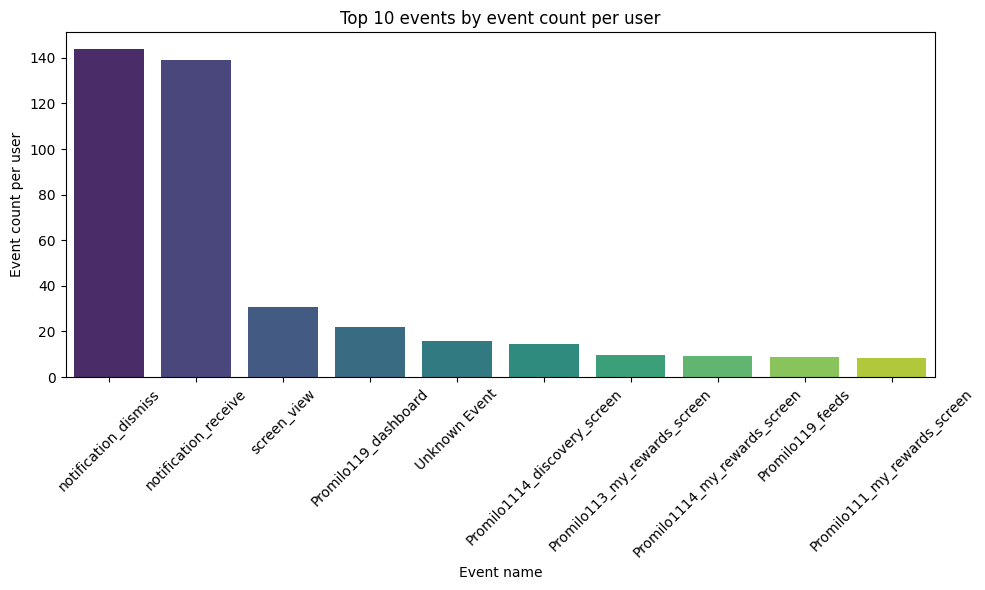

In [67]:
# Top 10 events count per user to see the effective events
plt.figure(figsize = (10,6))
sns.barplot(data= top_events, x = "Event name", y = "Event count per user", palette= "viridis")
plt.title("Top 10 events by event count per user")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

Numeric columns used for correlation:
Index(['Event name', 'Event count', 'Total users', 'Event count per user',
       'Total revenue', 'Event_count_bin'],
      dtype='object')


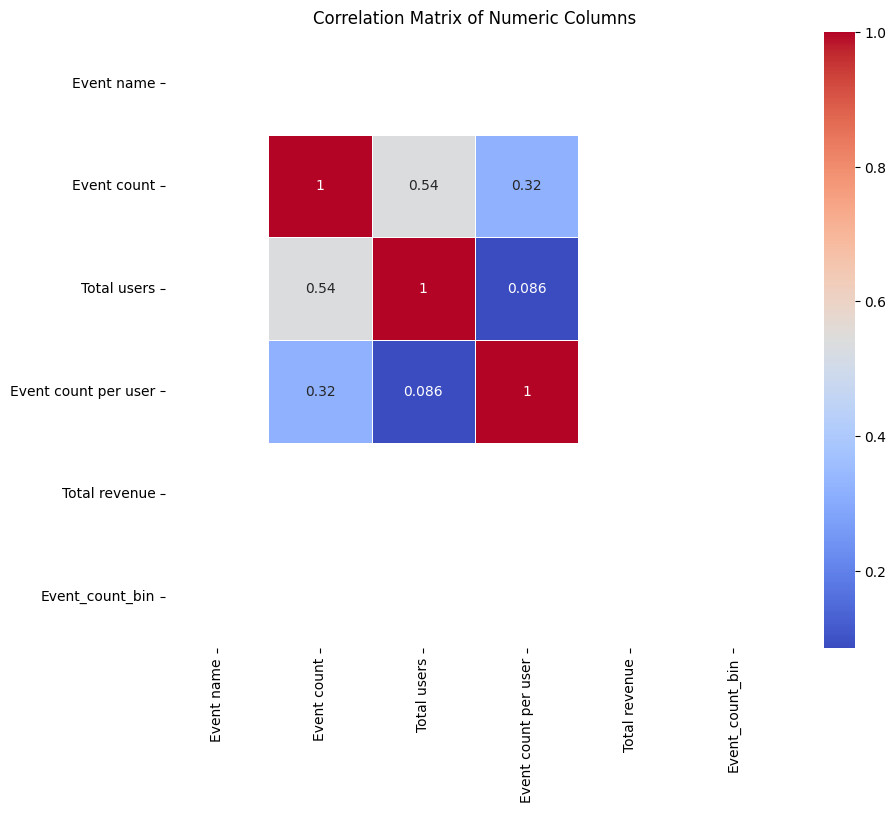

In [68]:
# numeric-like strings to  numeric format
data = data.apply(pd.to_numeric, errors='coerce', axis=0)

# filter out only the numeric columns
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Display the numeric columns 
print("Numeric columns used for correlation:")
print(numeric_df.columns)

# Correlation Matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


User Acquisition Report


In [70]:
data_1 = pd.read_excel("D:\\Business anlayst assesment\\Data set for BA (2).xlsx", sheet_name= "User Acquisition")
print(data_1.head())

  First user default channel group  New users  Engaged sessions  \
0                          Display       9957             12008   
1                   Organic Search       7652             18141   
2                      Paid Search       3025              4408   
3                           Direct       1903              4975   
4                       Unassigned        325              1619   

   Engagement rate  Engaged sessions per user  Average engagement time  \
0         0.544457                   1.206107                 58.86209   
1         0.813680                   2.367041                534.31280   
2         0.474284                   1.458154                102.23780   
3         0.318808                   2.261364               1128.88100   
4         0.813159                   4.981538                798.34150   

   Event count  Conversions  Total revenue  
0       204820        37434              0  
1       770710       109801              0  
2        81997   

In [71]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   First user default channel group  6 non-null      object 
 1   New users                         6 non-null      int64  
 2   Engaged sessions                  6 non-null      int64  
 3   Engagement rate                   6 non-null      float64
 4   Engaged sessions per user         6 non-null      float64
 5   Average engagement time           6 non-null      float64
 6   Event count                       6 non-null      int64  
 7   Conversions                       6 non-null      int64  
 8   Total revenue                     6 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 564.0+ bytes


In [72]:
data_1.isnull().sum()

First user default channel group    0
New users                           0
Engaged sessions                    0
Engagement rate                     0
Engaged sessions per user           0
Average engagement time             0
Event count                         0
Conversions                         0
Total revenue                       0
dtype: int64

In [74]:
data_1.describe()

,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,3812.000000,6860.666667,0.614435,2.262367,461.322532,219754.833333,32319.000000,0.0
std,4083.739659,6894.604867,0.201367,1.420806,437.111008,284869.104021,40929.227185,0.0
min,10.000000,13.000000,0.318808,1.206107,58.862090,248.000000,27.000000,0.0
25%,719.500000,2316.250000,0.491827,1.339538,113.003350,45489.250000,4284.250000,0.0
50%,2464.000000,4691.500000,0.633339,1.859759,339.806400,143408.500000,22931.500000,0.0
75%,6495.250000,10249.750000,0.790425,2.340622,732.334325,221780.500000,35848.750000,0.0
max,9957.000000,18141.000000,0.813680,4.981538,1128.881000,770710.000000,109801.000000,0.0


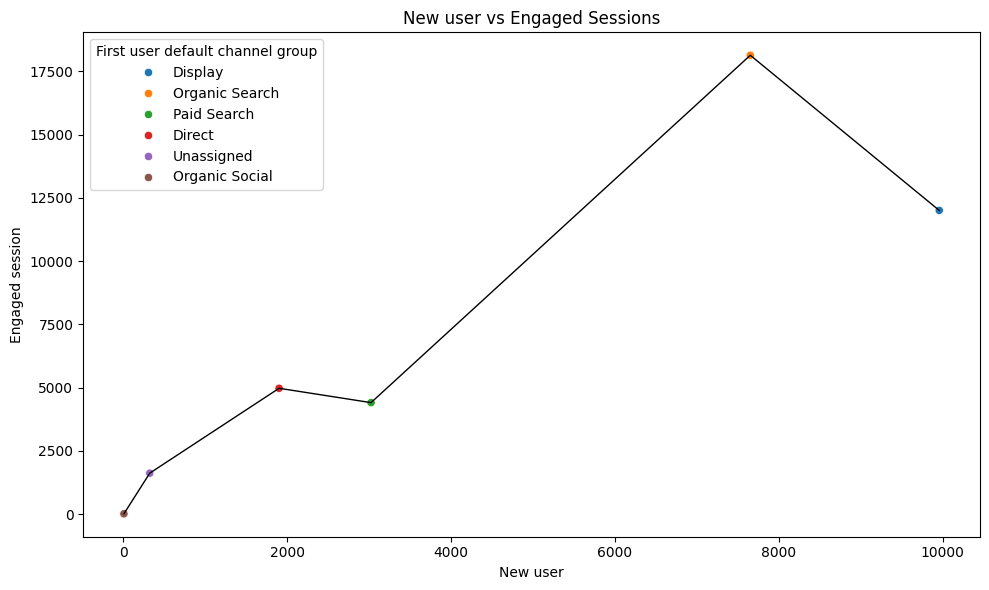

In [125]:
#correlation
numeric_df2 = data_1.select_dtypes(include= ["float64", "int64"])
correlation_matrix2 = numeric_df2.corr()
plt.figure(figsize= (10,6))
sns.scatterplot(data = data_1, x= "New users", y= "Engaged sessions", hue = "First user default channel group")

plt.plot(data_1["New users"],data_1["Engaged sessions"],color = "black", linewidth= 1, label="connecting line")
plt.title("New user vs Engaged Sessions")
plt.xlabel("New user")
plt.ylabel("Engaged session")
plt.tight_layout()
plt.show()

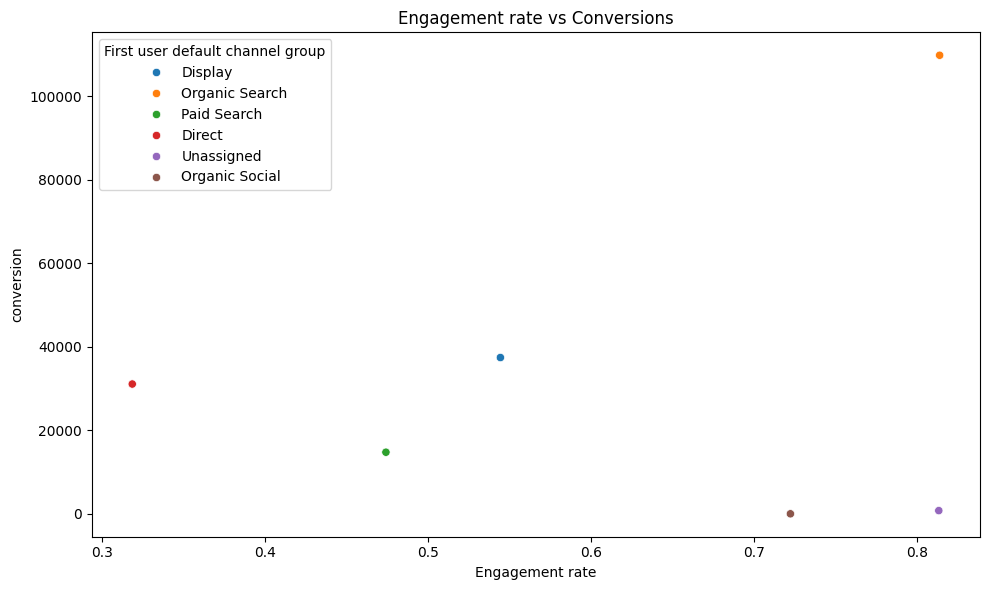

In [129]:
plt.figure(figsize= (10,6))
sns.scatterplot(data= data_1, x = "Engagement rate",y= "Conversions", color= "red", hue = "First user default channel group")

plt.title("Engagement rate vs Conversions")
plt.xlabel("Engagement rate")
plt.ylabel("conversion")
plt.tight_layout()
plt.show()

Demographic Report


In [90]:
#Repeat all the intial process
data_2 = pd.read_excel("D:\\Business anlayst assesment\\Data set for BA (2).xlsx", sheet_name= "Demographics Report")
print(data_2.head())

          Country  Users  New users  Engaged sessions  Engagement rate  \
0           India  23024      22528             41479         0.593626   
1   United States    272        213               197         0.491272   
2          Canada     37         18                25         0.416667   
3       (not set)     36         36                17         0.459459   
4  United Kingdom     20          8                13         0.371429   

   Engaged sessions per user  Average engagement time  Event count  \
0                   1.801555                334.81660      1312097   
1                   0.724265                 50.96324         3157   
2                   0.675676                 43.21622          410   
3                   0.472222                 24.80556          241   
4                   0.650000                 61.85000          289   

   Conversions  Total revenue  
0       192766              0  
1          643              0  
2          121              0  
3     

In [91]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    47 non-null     object 
 1   Users                      47 non-null     int64  
 2   New users                  47 non-null     int64  
 3   Engaged sessions           47 non-null     int64  
 4   Engagement rate            47 non-null     float64
 5   Engaged sessions per user  47 non-null     float64
 6   Average engagement time    47 non-null     float64
 7   Event count                47 non-null     int64  
 8   Conversions                47 non-null     int64  
 9   Total revenue              47 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.8+ KB


In [92]:
data_2.isnull().sum()

Country                      0
Users                        0
New users                    0
Engaged sessions             0
Engagement rate              0
Engaged sessions per user    0
Average engagement time      0
Event count                  0
Conversions                  0
Total revenue                0
dtype: int64

In [93]:
data_2.describe()

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,47.0
mean,500.148936,486.638298,890.340426,0.561662,0.835367,48.376626,2.805381e+04,4125.829787,0.0
std,3357.099816,3285.103773,6049.238031,0.358970,0.568228,93.511799,1.913692e+05,28114.328609,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.0
25%,1.000000,0.000000,1.000000,0.364286,0.550000,6.800000,7.000000e+00,2.000000,0.0
50%,2.000000,1.000000,1.000000,0.533333,1.000000,17.000000,2.300000e+01,4.000000,0.0
75%,7.000000,3.000000,6.000000,1.000000,1.000000,48.428570,8.650000e+01,15.500000,0.0
max,23024.000000,22528.000000,41479.000000,1.000000,2.666667,536.000000,1.312097e+06,192766.000000,0.0


In [106]:
new_users = data_2.groupby("Country")["New users"].sum().nlargest(10).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\3459973244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= new_users, x='Country', y='New users', palette='viridis')


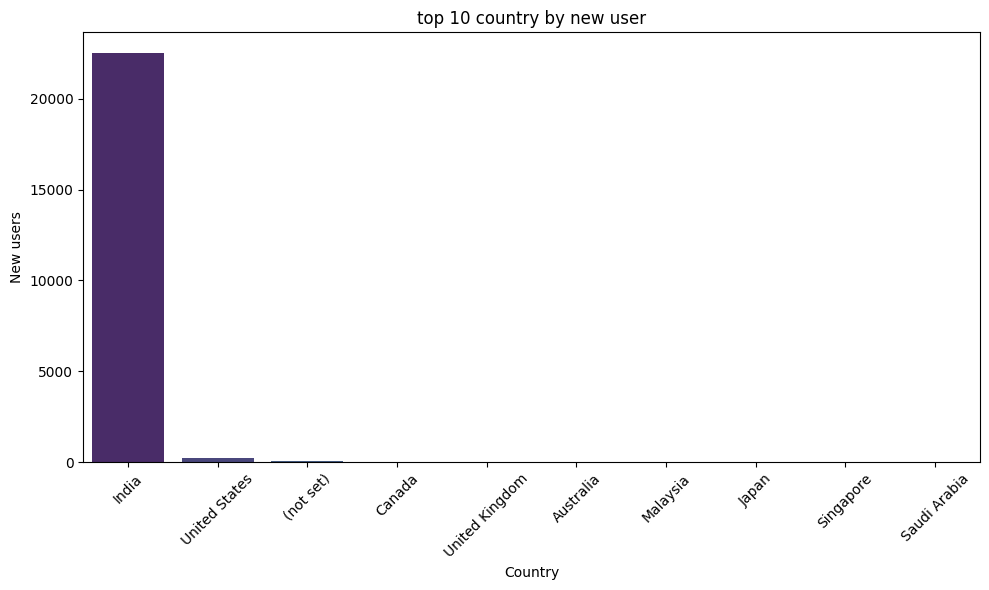

In [148]:
# 1. top 10 country by new user
plt.figure(figsize=(10, 6))
sns.barplot(data= new_users, x='Country', y='New users', palette='viridis')
plt.title('top 10 country by new user')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

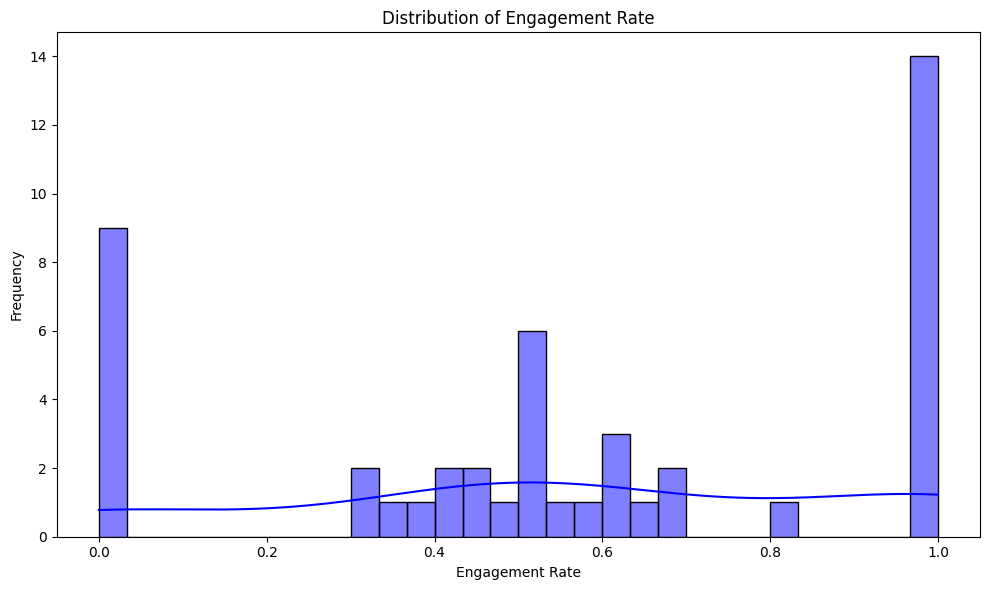

In [108]:
# 2. Engagement Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_2['Engagement rate'], bins=30, kde=True, color='blue')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

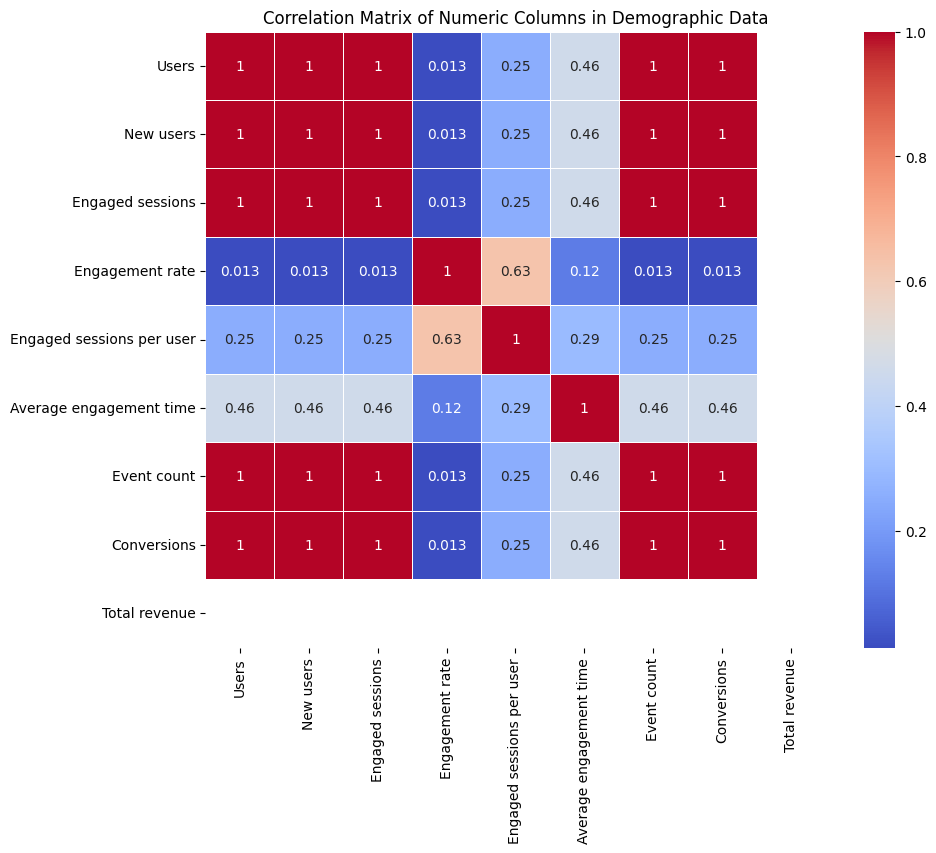

In [109]:
# 3. Correlation Matrix for Numeric Columns
numeric_demographics = data_2.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix_demographics = numeric_demographics.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_demographics, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns in Demographic Data')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19532\3025323765.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


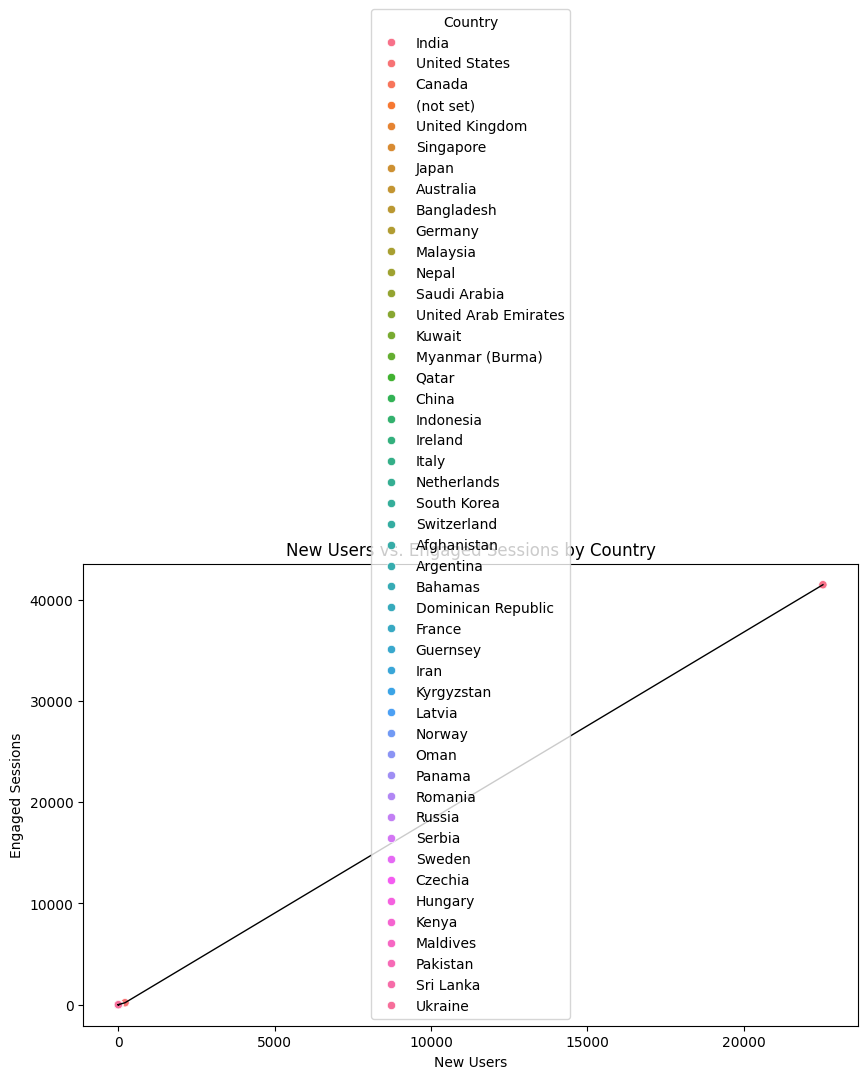

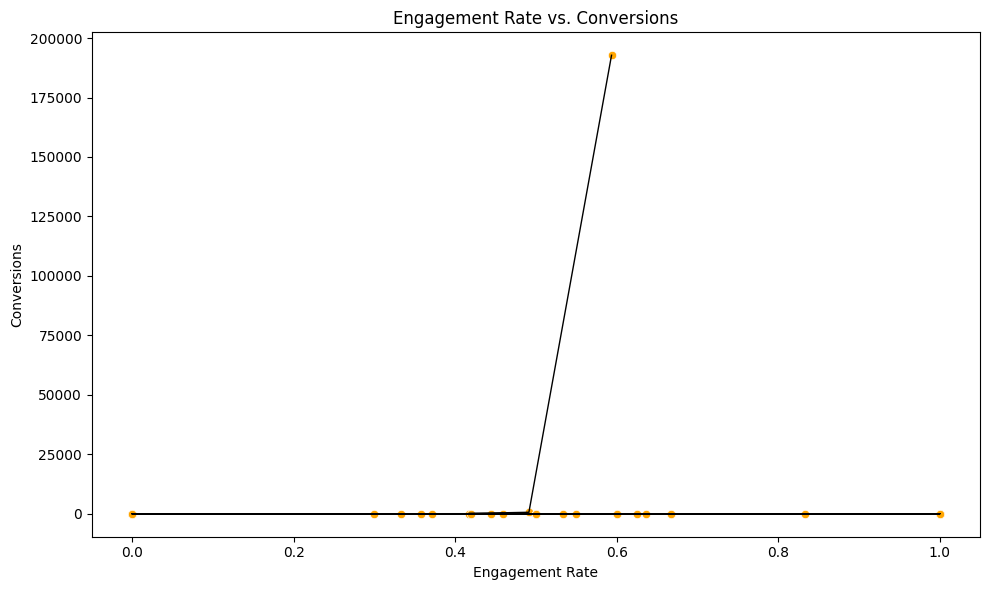

In [132]:






# User Installation & Engagement Performance Analysis
# Analyzing relationship between 'New users' and 'Engaged sessions'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_2, x='New users', y='Engaged sessions', hue='Country')
plt.plot(data_2["New users"],data_2["Engaged sessions"],color = "black", linewidth= 1, label="connecting line")

plt.title('New Users vs. Engaged Sessions by Country')
plt.xlabel('New Users')
plt.ylabel('Engaged Sessions')
plt.tight_layout()
plt.show()

# Marketing Campaign Analysis (Example)
# Analyzing Conversions against Engagement Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_2, x='Engagement rate', y='Conversions', color='orange')
plt.plot(data_2["Engagement rate"],data_2["Conversions"],color = "black", linewidth= 1, label="connecting line")

plt.title('Engagement Rate vs. Conversions')
plt.xlabel('Engagement Rate')
plt.ylabel('Conversions')
plt.tight_layout()
plt.show()

Citiwise Report


In [133]:
data_3 = pd.read_excel("D:\\Business anlayst assesment\\Data set for BA (2).xlsx", sheet_name= "Citiwise Report")
print(data_3.head())

   Town/City  Users  New users  Engaged sessions  Engagement rate  \
0  Bengaluru   6097       5685             15013         0.769385   
1      Patna   1594       1467              2127         0.440646   
2  Hyderabad   1038        920              1578         0.569264   
3     Indore    983        915              1241         0.426460   
4    Lucknow    897        839              1125         0.450180   

   Engaged sessions per user  Average engagement time  Event count  \
0                   2.462359                762.20550       607200   
1                   1.334379                 98.22208        38830   
2                   1.520231                243.69080        96826   
3                   1.262462                 67.89115        21383   
4                   1.254181                 83.40580        21041   

   Conversions  Total revenue  
0        62939              0  
1         6980              0  
2        34103              0  
3         4121              0  
4   

In [134]:
data_3.isnull().sum()

Town/City                    0
Users                        0
New users                    0
Engaged sessions             0
Engagement rate              0
Engaged sessions per user    0
Average engagement time      0
Event count                  0
Conversions                  0
Total revenue                0
dtype: int64

In [135]:
data_3.describe()

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
count,574.000000,574.000000,574.00000,574.000000,574.000000,574.000000,574.000000,574.000000,574.0
mean,46.203833,39.846690,71.61324,0.489662,0.884915,94.093768,2297.088850,337.829268,0.0
std,290.091708,267.115856,656.03377,0.341660,0.750856,202.850678,26179.153773,3074.301547,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,1.000000,1.000000,1.00000,0.250000,0.500000,7.000000,10.000000,2.000000,0.0
50%,2.000000,1.000000,2.00000,0.497547,1.000000,27.500000,35.000000,5.000000,0.0
75%,7.750000,5.000000,7.00000,0.724026,1.000000,98.402298,162.750000,23.000000,0.0
max,6097.000000,5685.000000,15013.00000,1.000000,7.000000,2721.000000,607200.000000,62939.000000,0.0


In [137]:
top_users_by_city= data_3.groupby("Town/City")["Users"].sum().nlargest(10).reset_index()

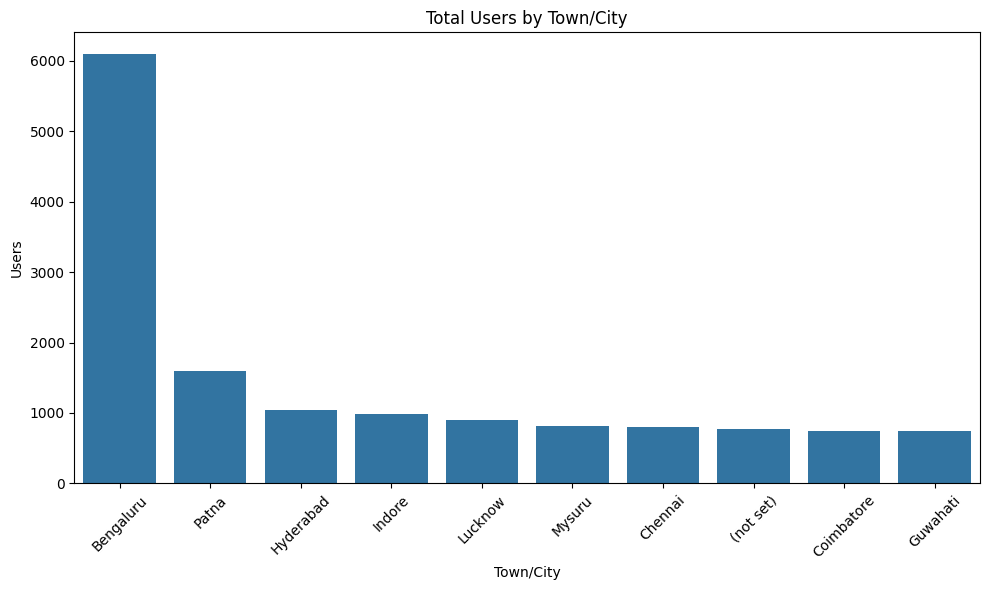

In [138]:
# Visualizing Users vs. Engaged Sessions
plt.figure(figsize=(10, 6))
sns.barplot(data=top_users_by_city, x='Town/City', y='Users')
plt.title('Total Users by Town/City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

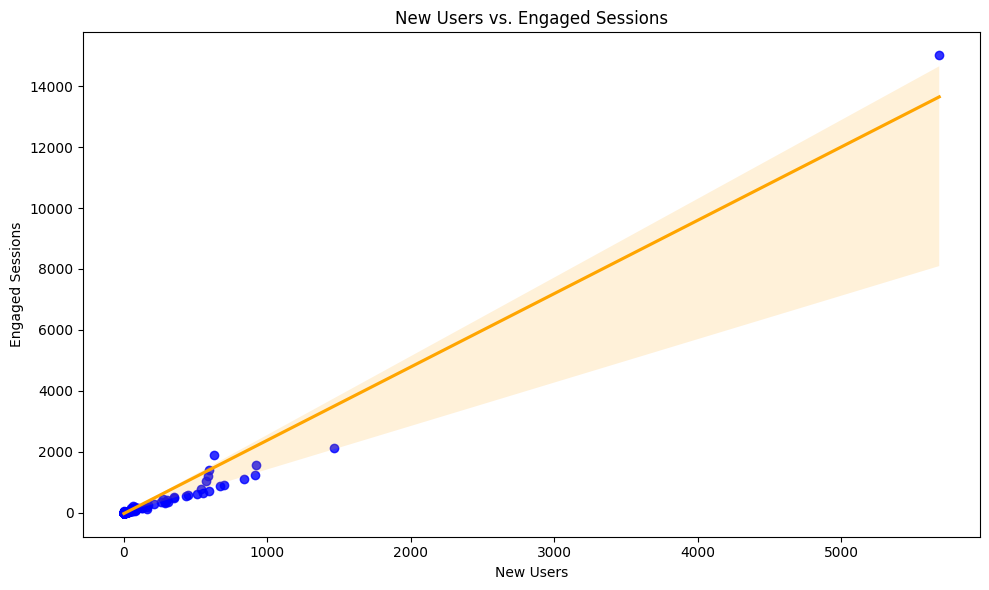

In [139]:
# Analyze the relationship between New Users and Engaged Sessions
plt.figure(figsize=(10, 6))
sns.regplot(data=data_3, x='New users', y='Engaged sessions', scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
plt.title('New Users vs. Engaged Sessions')
plt.xlabel('New Users')
plt.ylabel('Engaged Sessions')
plt.tight_layout()
plt.show()

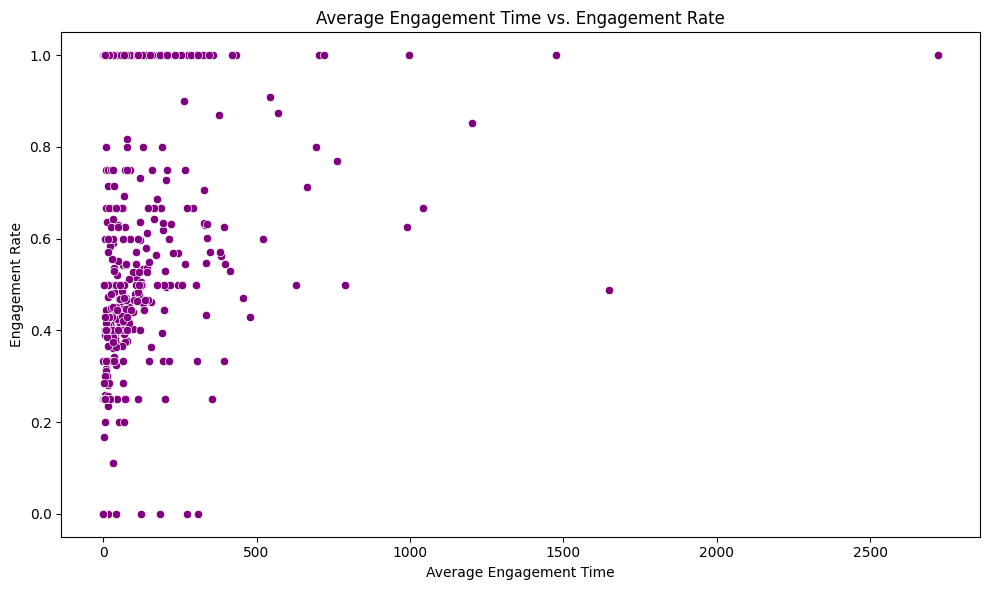

In [142]:
# Scatter plot of Engagement Rate vs. Average Engagement Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_3, x='Average engagement time', y='Engagement rate', color='purple')
plt.title('Average Engagement Time vs. Engagement Rate')
plt.xlabel('Average Engagement Time')
plt.ylabel('Engagement Rate')
plt.tight_layout()
plt.show()
